In [7]:
import numpy as np

# Example: Creating a NumPy array
data = np.array([1, 2, 3, 4, 5])
data

array([1, 2, 3, 4, 5])

In [8]:
import numpy as np
from scipy import stats

# Generating random data
random_data = np.random.normal(loc=0, scale=1, size=100)

# Calculate mean and standard deviation using scipy.stats
mean = np.mean(random_data)
median = np.median(data)
std_dev = np.std(random_data)

# Perform a normality test using Shapiro-Wilk test
shapiro_stat, shapiro_p_value = stats.shapiro(random_data)

print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std_dev)
print("Shapiro-Wilk Test Statistic:", shapiro_stat)
print("Shapiro-Wilk p-value:", shapiro_p_value)



Mean: -0.057851345652750484
Median: 3.0
Standard Deviation: 0.9997197839104618
Shapiro-Wilk Test Statistic: 0.9883469343185425
Shapiro-Wilk p-value: 0.5341315865516663


In [10]:

# Example: One-sample t-test
# Generate random data from a normal distribution with mean 0 and standard deviation 1
sample_data = np.random.normal(loc=0, scale=1, size=100)

# Perform a one-sample t-test to determine if the mean of the sample is significantly different from 0
# Null hypothesis (H0): The mean of the sample is equal to 0
# Alternative hypothesis (H1): The mean of the sample is not equal to 0
t_stat, p_value = stats.ttest_1samp(sample_data, 0)

# Print out the results
print("One-sample t-test results:")
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Interpretation of results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis. The mean of the sample is significantly different from 0.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference from 0 in the mean of the sample.")


One-sample t-test results:
t-statistic: -1.479799861702209
p-value: 0.1421019026676376
Fail to reject the null hypothesis. There is no significant difference from 0 in the mean of the sample.


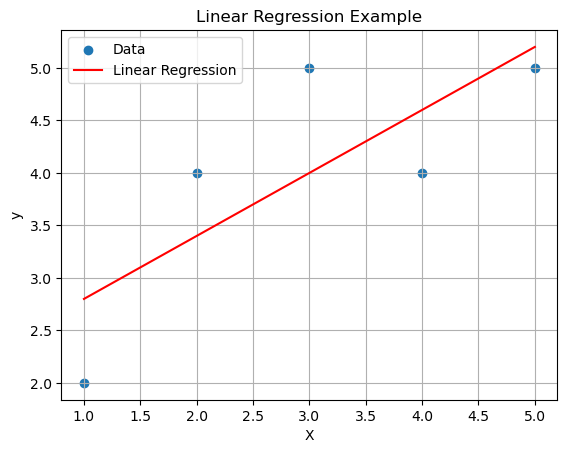

In [11]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Example: Linear regression
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Adding a constant term to the independent variable X
X_with_const = sm.add_constant(X)

# Fitting the OLS (Ordinary Least Squares) regression model
model = sm.OLS(y, X_with_const).fit()

# Predictions from the model
y_pred = model.predict(X_with_const)

# Plotting the data points and the regression line
plt.scatter(X, y, label='Data')
plt.plot(X, y_pred, color='red', label='Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Example')
plt.legend()
plt.grid(True)
plt.show()


Accuracy: 0.875
Confusion Matrix:
 [[20  1]
 [ 4 15]]


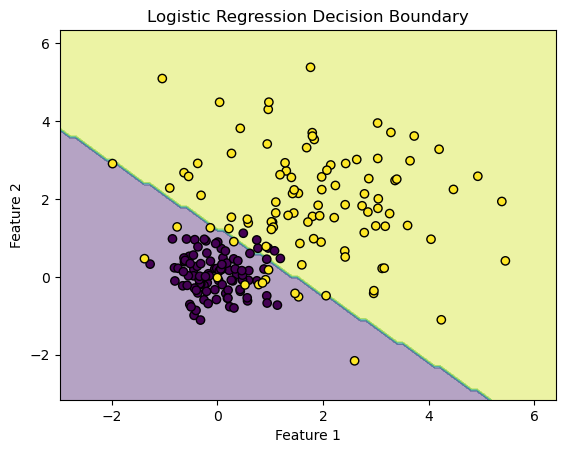

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Generate random features X1 and X2 from different distributions
np.random.seed(0)
n_samples = 100
X1 = np.random.randn(n_samples, 2) * 0.5  # Features from N(0, 0.25)
X2 = np.random.randn(n_samples, 2) * 1.5 + 2  # Features from N(2, 2.25)

# Combine X1 and X2 into one feature matrix X
X = np.vstack((X1, X2))

# Generate corresponding labels y (0 for X1, 1 for X2)
y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolors='k')
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [14]:
import pandas as pd
# pip install pandas-datareader
# pip install --upgrade mplfinance
import pandas_datareader.data as web
import mplfinance as mpf
import datetime
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'mplfinance'

In [9]:

start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 1, 1)
symbols = ['^DJI', 'AAPL', 'GOOG', 'MSFT']
data = []

for sym in symbols:
    try:
        data.append(web.DataReader(sym, data_source='yahoo', start=start, end=end))
    except Exception as e:
        print(f"Error fetching data for {sym}: {e}")


NameError: name 'datetime' is not defined

In [16]:
# Se non funzione sopra, prova questo

#Prima "pip install yfinance" in terminal

import yfinance as yf

start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 1, 1)
symbols = ['DJI', 'AAPL', 'GOOG', 'MSFT']
data = []

for sym in symbols:
    try:
        data.append(yf.download(sym, start=start, end=end))
    except Exception as e:
        print(f"Error fetching data for {sym}: {e}")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [17]:
df = pd.concat(data, axis=1, keys=symbols)

# Print the first few rows of the DataFrame
print(df.head())

                     DJI                                            \
                    Open          High           Low         Close   
Date                                                                 
2010-01-04  10584.000000  10584.000000  10584.000000  10584.000000   
2010-01-05  10572.000000  10572.000000  10572.000000  10572.000000   
2010-01-06  10573.700195  10573.700195  10573.700195  10573.700195   
2010-01-07  10606.900391  10606.900391  10606.900391  10606.900391   
2010-01-08  10618.200195  10618.200195  10618.200195  10618.200195   

                                     AAPL                                ...  \
               Adj Close Volume      Open      High       Low     Close  ...   
Date                                                                     ...   
2010-01-04  10584.000000    0.0  7.622500  7.660714  7.585000  7.643214  ...   
2010-01-05  10572.000000    0.0  7.664286  7.699643  7.616071  7.656429  ...   
2010-01-06  10573.700195    0.0  7.6564

In [30]:

# Define start and end dates
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 1, 1)

# Define stock symbols
symbols = ['DJI', 'AAPL', 'GOOG', 'MSFT']

# Download data for each symbol
data = []
for sym in symbols:
    try:
        data.append(yf.download(sym, start=start, end=end)['Close'])  # Extract only the 'Close' prices
    except Exception as e:
        print(f"Error fetching data for {sym}: {e}")

# Concatenate 'Close' prices into a single DataFrame
close_df = pd.concat(data, axis=1, keys=symbols)

# Print the first few rows of the DataFrame
print(close_df.head())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                     DJI      AAPL       GOOG       MSFT
Date                                                    
2010-01-04  10584.000000  7.643214  15.610239  30.950001
2010-01-05  10572.000000  7.656429  15.541497  30.959999
2010-01-06  10573.700195  7.534643  15.149715  30.770000
2010-01-07  10606.900391  7.520714  14.797037  30.450001
2010-01-08  10618.200195  7.570714  14.994298  30.660000


In [16]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = close_df.corr()

# Plot the correlation matrix using Seaborn
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Closing Prices of Stocks')
plt.xlabel('Stock Symbols')
plt.ylabel('Stock Symbols')
plt.show()


NameError: name 'close_df' is not defined

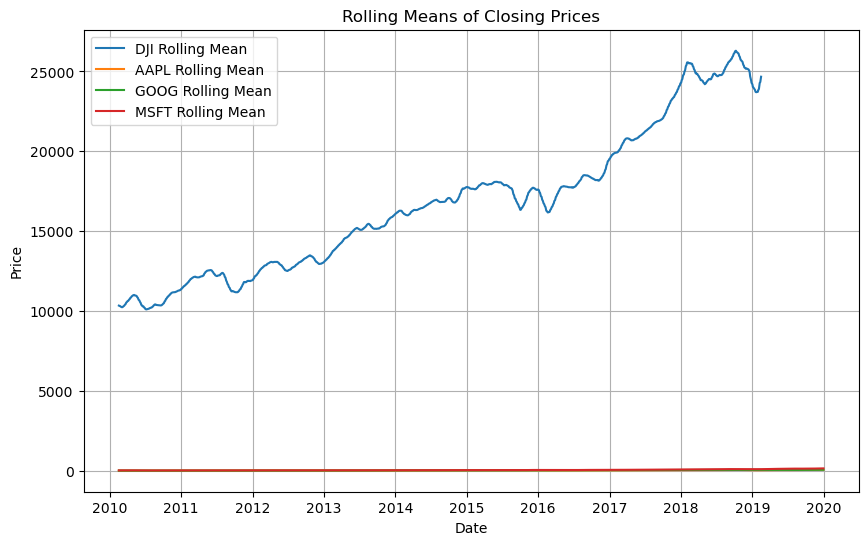

In [32]:
import matplotlib.pyplot as plt

# Calculate rolling means
rolling_means = close_df.rolling(window=30).mean()  # Assuming a window size of 30 days

# Plot the rolling means
plt.figure(figsize=(10, 6))
for symbol in symbols:
    plt.plot(close_df.index, rolling_means[symbol], label=f'{symbol} Rolling Mean')

plt.title('Rolling Means of Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


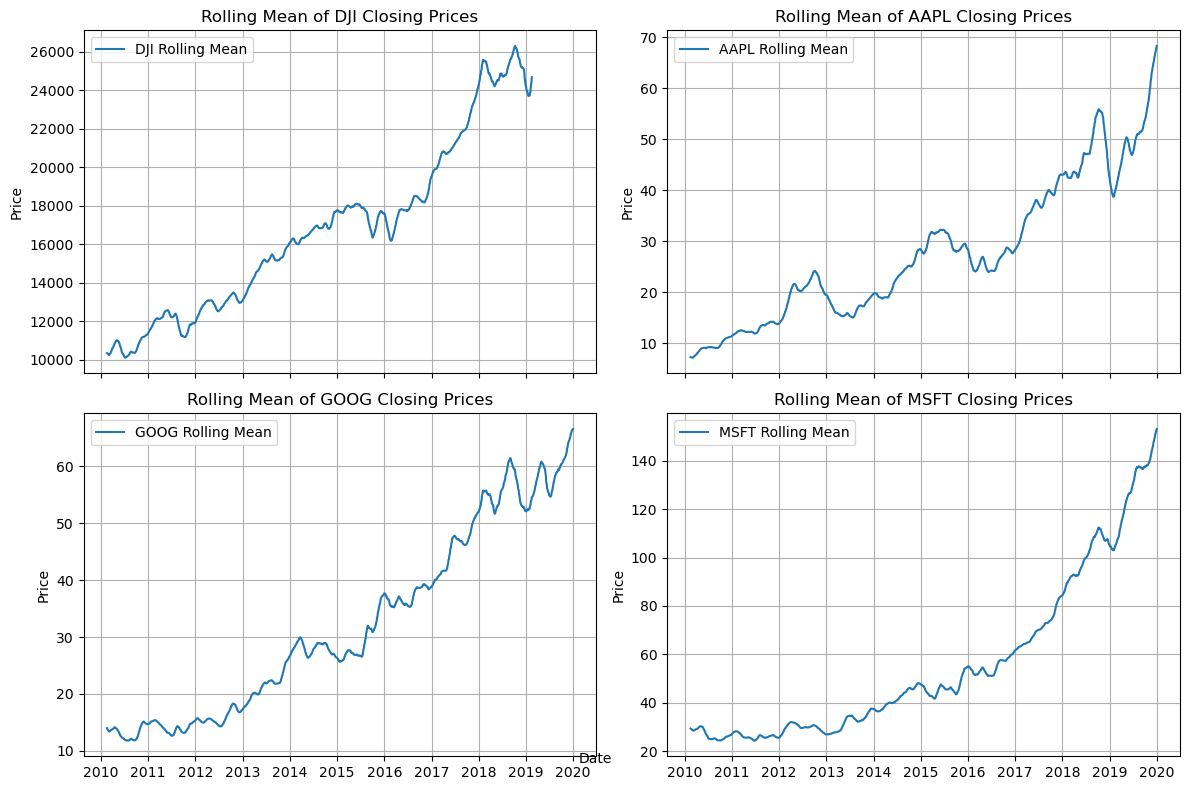

In [33]:
# Plot each rolling mean on a separate graph in a 2 by 2 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), sharex=True, sharey=False)

for i, symbol in enumerate(symbols):
    row = i // 2  # Calculate the row index
    col = i % 2   # Calculate the column index
    axes[row, col].plot(close_df.index, rolling_means[symbol], label=f'{symbol} Rolling Mean')
    axes[row, col].set_title(f'Rolling Mean of {symbol} Closing Prices')
    axes[row, col].set_ylabel('Price')
    axes[row, col].legend()
    axes[row, col].grid(True)

fig.text(0.5, 0.04, 'Date', ha='center')
plt.tight_layout()
plt.show()


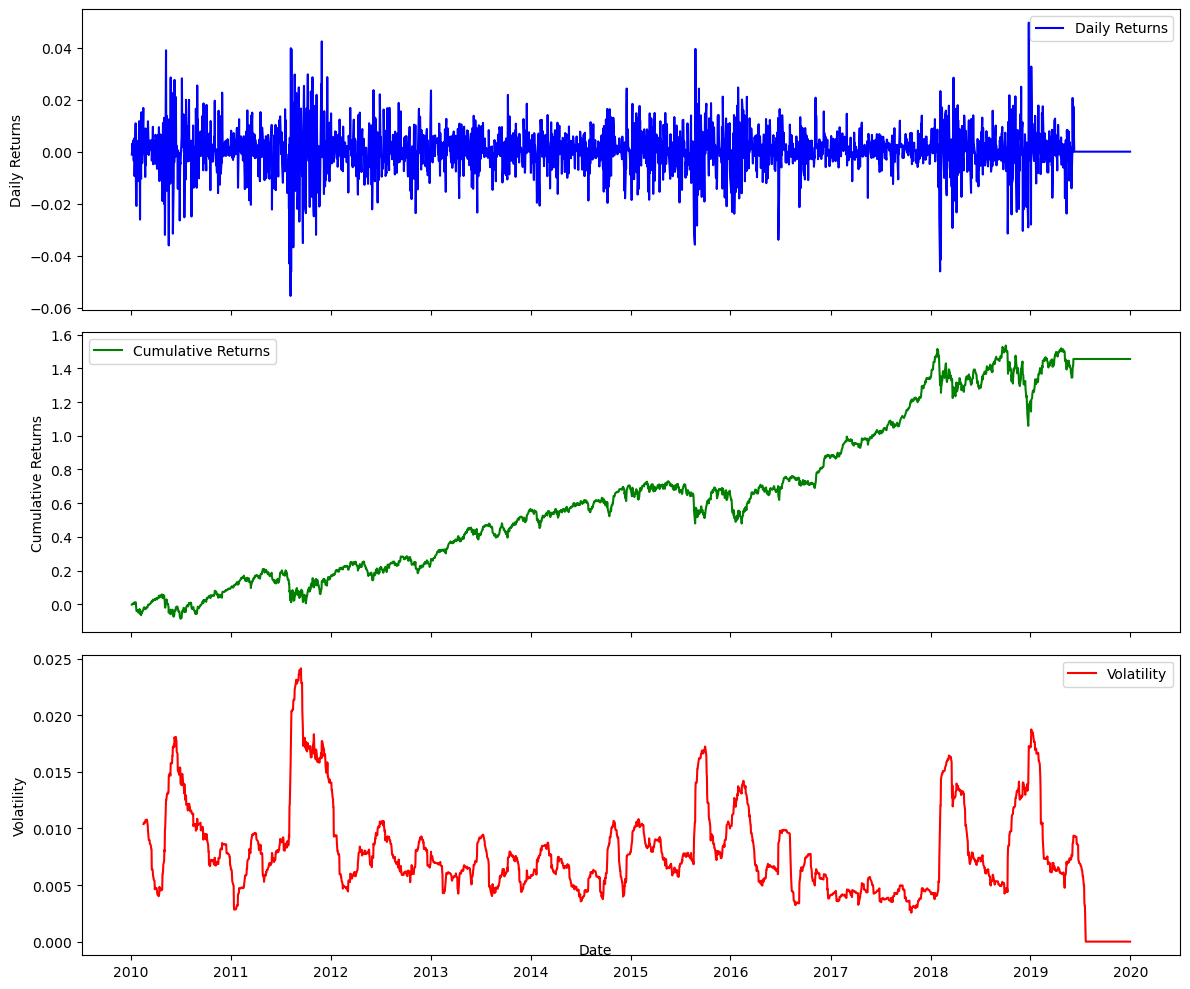

In [34]:
# Calculate daily returns, cumulative returns, and volatility for DJI
dji_daily_returns = close_df['DJI'].pct_change()
dji_cumulative_returns = (1 + dji_daily_returns).cumprod() - 1
dji_volatility = dji_daily_returns.rolling(window=30).std()  # Assuming a window size of 30 days for volatility calculation

# Plotting
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 10), sharex=True)

# Plot daily returns
axes[0].plot(dji_daily_returns.index, dji_daily_returns, label='Daily Returns', color='blue')
axes[0].set_ylabel('Daily Returns')
axes[0].legend()

# Plot cumulative returns
axes[1].plot(dji_cumulative_returns.index, dji_cumulative_returns, label='Cumulative Returns', color='green')
axes[1].set_ylabel('Cumulative Returns')
axes[1].legend()

# Plot volatility
axes[2].plot(dji_volatility.index, dji_volatility, label='Volatility', color='red')
axes[2].set_ylabel('Volatility')
axes[2].legend()

fig.text(0.5, 0.04, 'Date', ha='center')
plt.tight_layout()
plt.show()


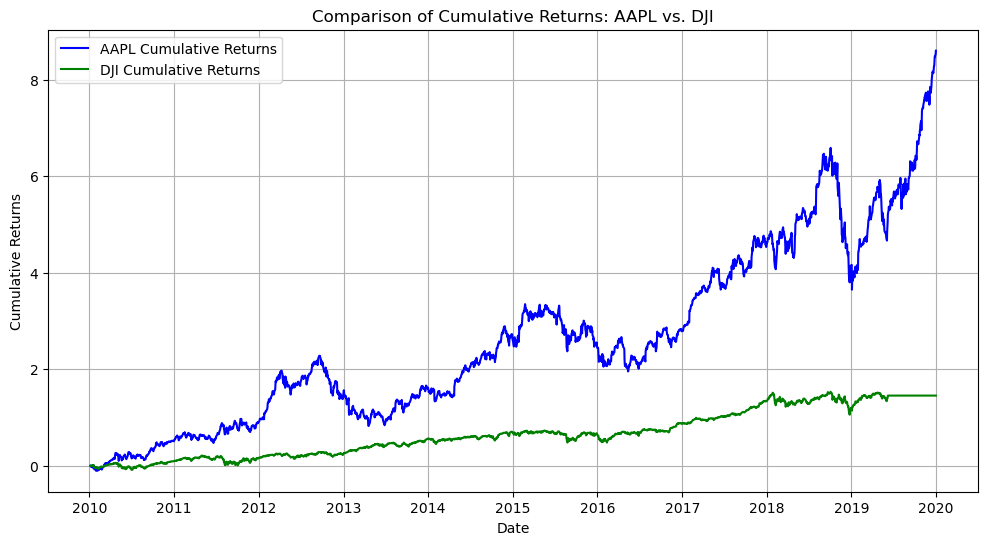

In [36]:
# Calculate cumulative returns for AAPL and DJI
aapl_cumulative_returns = (1 + close_df['AAPL'].pct_change()).cumprod() - 1
dji_cumulative_returns = (1 + close_df['DJI'].pct_change()).cumprod() - 1

# Plotting
plt.figure(figsize=(12, 6))

# Plot AAPL cumulative returns
plt.plot(aapl_cumulative_returns.index, aapl_cumulative_returns, label='AAPL Cumulative Returns', color='blue')

# Plot DJI cumulative returns
plt.plot(dji_cumulative_returns.index, dji_cumulative_returns, label='DJI Cumulative Returns', color='green')

plt.title('Comparison of Cumulative Returns: AAPL vs. DJI')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()


In [41]:
# 'pip install xlrd'

# Define the file path
file_path = 'rate-vs-unemployment-clean.xls'

# Read the Excel file into a DataFrame
data = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
print(data.head())


        DATE       DFF  U2RATE
0 1967-01-01  4.943548     1.6
1 1967-02-01  5.000000     1.6
2 1967-03-01  4.532258     1.5
3 1967-04-01  4.054333     1.6
4 1967-05-01  3.940000     1.6


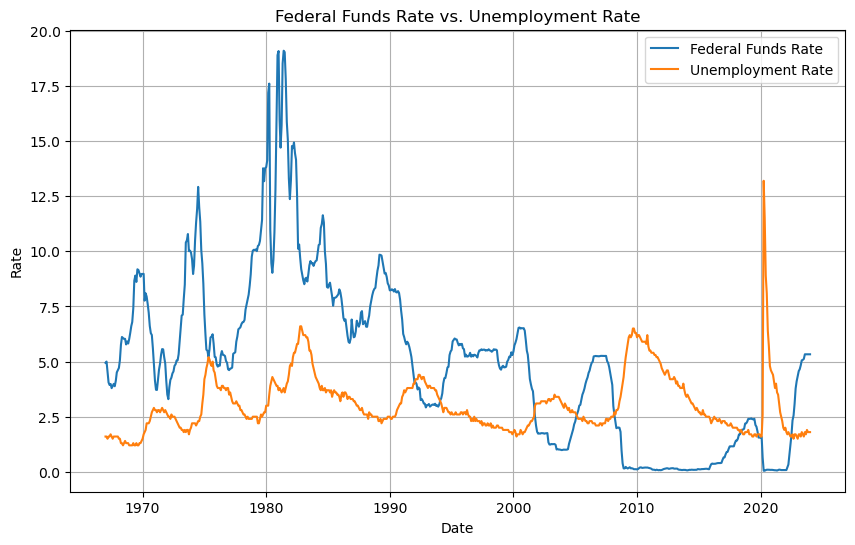

In [42]:

# Plotting
plt.figure(figsize=(10, 6))

# Plot the 'DFF' series (federal funds rate)
plt.plot(data['DATE'], data['DFF'], label='Federal Funds Rate')

# Plot the 'U2RATE' series (unemployment rate)
plt.plot(data['DATE'], data['U2RATE'], label='Unemployment Rate')

plt.title('Federal Funds Rate vs. Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend()
plt.grid(True)
plt.show()

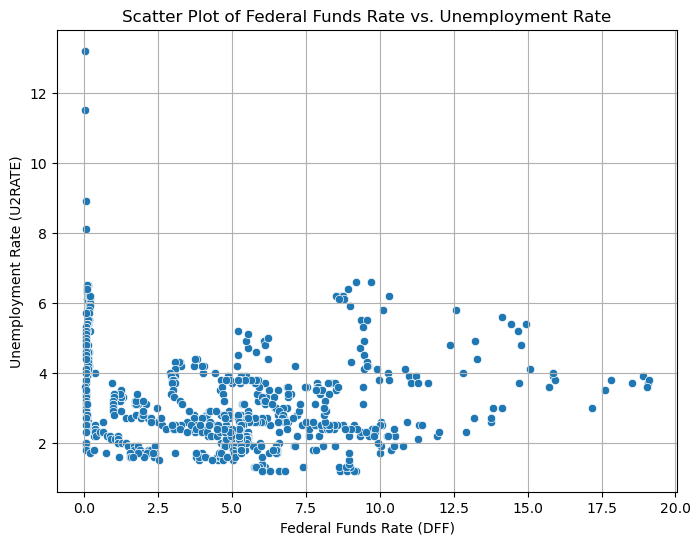

Correlation Coefficient: -0.09191124823648193
p-value: 0.01611726630512886
The correlation is statistically significant.


In [39]:
from scipy.stats import pearsonr

# Create a scatter plot of DFF vs U2RATE
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='DFF', y='U2RATE')
plt.title('Scatter Plot of Federal Funds Rate vs. Unemployment Rate')
plt.xlabel('Federal Funds Rate (DFF)')
plt.ylabel('Unemployment Rate (U2RATE)')
plt.grid(True)
plt.show()

# Calculate the correlation coefficient
correlation_coefficient, p_value = pearsonr(data['DFF'], data['U2RATE'])
print(f'Correlation Coefficient: {correlation_coefficient}')
print(f'p-value: {p_value}')

# Test for significance
alpha = 0.05
if p_value < alpha:
    print('The correlation is statistically significant.')
else:
    print('The correlation is not statistically significant.')


In [65]:
# Define the maximum lag
max_lag = 36  # You can adjust this value as needed

# Calculate correlation for each lag
correlation_results = {}
for lag in range(0, max_lag + 1):
    # Create lagged version of DFF series
    data[f'DFF_lag{lag}'] = data['DFF'].shift(lag)
    
    # Calculate correlation between lagged DFF and U2RATE
    correlation_coefficient = data['U2RATE'].corr(data[f'DFF_lag{lag}'])
    correlation_results[f'Lag {lag}'] = correlation_coefficient
    

# Display correlation results
for lag, correlation_coefficient in correlation_results.items():
    print(f'Correlation between U2RATE and DFF with lag {lag}: {correlation_coefficient}')


Correlation between U2RATE and DFF with lag Lag 0: -0.09191124823648197
Correlation between U2RATE and DFF with lag Lag 1: -0.074968657301712
Correlation between U2RATE and DFF with lag Lag 2: -0.053586586313432064
Correlation between U2RATE and DFF with lag Lag 3: -0.031206274874616826
Correlation between U2RATE and DFF with lag Lag 4: -0.008238139101159518
Correlation between U2RATE and DFF with lag Lag 5: 0.014904965668038204
Correlation between U2RATE and DFF with lag Lag 6: 0.038442144636042584
Correlation between U2RATE and DFF with lag Lag 7: 0.061856474444677366
Correlation between U2RATE and DFF with lag Lag 8: 0.08497217012922802
Correlation between U2RATE and DFF with lag Lag 9: 0.10789326285474989
Correlation between U2RATE and DFF with lag Lag 10: 0.13004539570648685
Correlation between U2RATE and DFF with lag Lag 11: 0.15142180428863558
Correlation between U2RATE and DFF with lag Lag 12: 0.17145732472477093
Correlation between U2RATE and DFF with lag Lag 13: 0.18988629384

In [66]:
from scipy.stats import pearsonr

# Define the maximum lag
max_lag = 36  # You can adjust this value as needed

# Calculate correlation for each lag
correlation_results = {}
for lag in range(0, max_lag + 1):
    # Create lagged version of DFF series
    data[f'DFF_lag{lag}'] = data['DFF'].shift(lag)
    
    # Combine lagged DFF and U2RATE series
    combined_series = pd.concat([data['U2RATE'], data[f'DFF_lag{lag}']], axis=1).dropna()
    
    # Calculate correlation between lagged DFF and U2RATE
    correlation_coefficient, p_value = pearsonr(combined_series['U2RATE'], combined_series[f'DFF_lag{lag}'])
    correlation_results[f'Lag {lag}'] = (correlation_coefficient, p_value)

# Display correlation results
for lag, (correlation_coefficient, p_value) in correlation_results.items():
    significance = 'Significant' if p_value < 0.05 else 'Not Significant'
    print(f'Correlation between U2RATE and DFF with {lag}: {correlation_coefficient} (p-value: {p_value}, {significance})')


Correlation between U2RATE and DFF with Lag 0: -0.09191124823648193 (p-value: 0.01611726630512886, Significant)
Correlation between U2RATE and DFF with Lag 1: -0.07496865730171208 (p-value: 0.0500124742053149, Not Significant)
Correlation between U2RATE and DFF with Lag 2: -0.053586586313432105 (p-value: 0.1618470993608686, Not Significant)
Correlation between U2RATE and DFF with Lag 3: -0.031206274874616805 (p-value: 0.41584024801835107, Not Significant)
Correlation between U2RATE and DFF with Lag 4: -0.008238139101159527 (p-value: 0.8300862223061325, Not Significant)
Correlation between U2RATE and DFF with Lag 5: 0.014904965668038178 (p-value: 0.698030519637336, Not Significant)
Correlation between U2RATE and DFF with Lag 6: 0.038442144636042494 (p-value: 0.31719669520666083, Not Significant)
Correlation between U2RATE and DFF with Lag 7: 0.06185647444467728 (p-value: 0.10756936223115152, Not Significant)
Correlation between U2RATE and DFF with Lag 8: 0.08497217012922807 (p-value: 0.

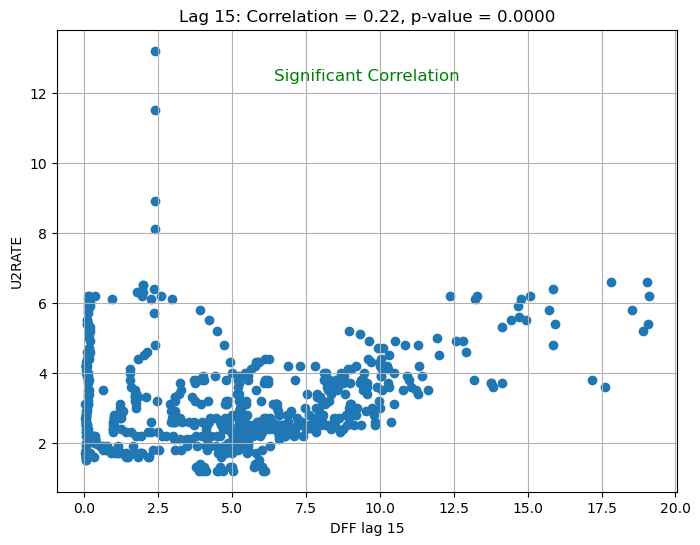

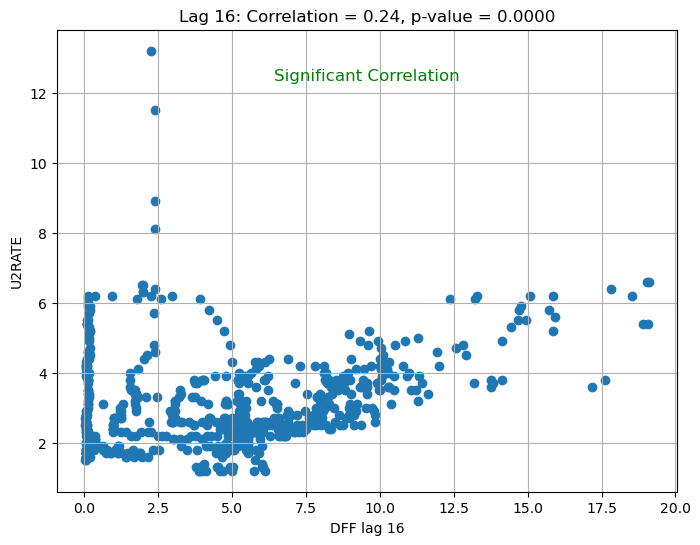

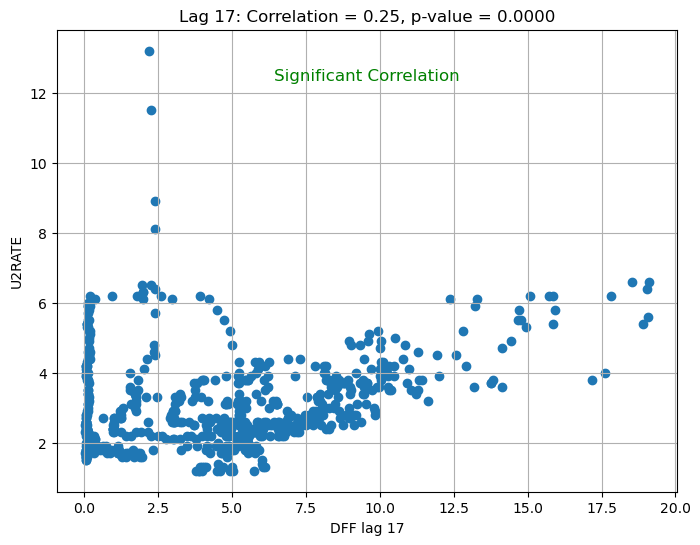

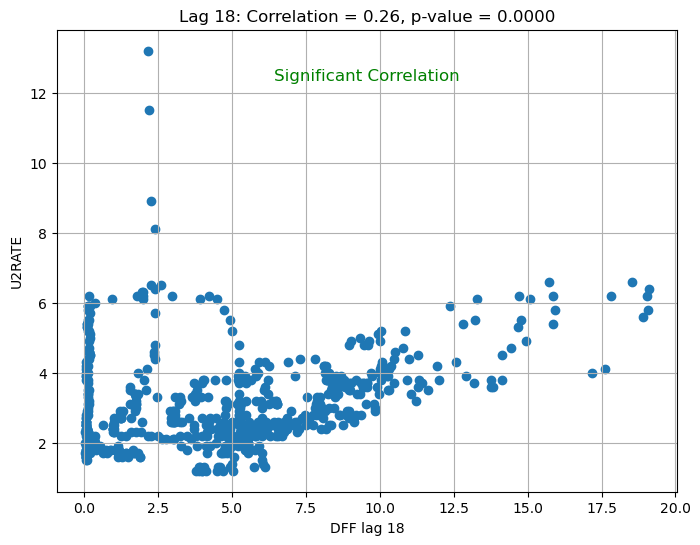

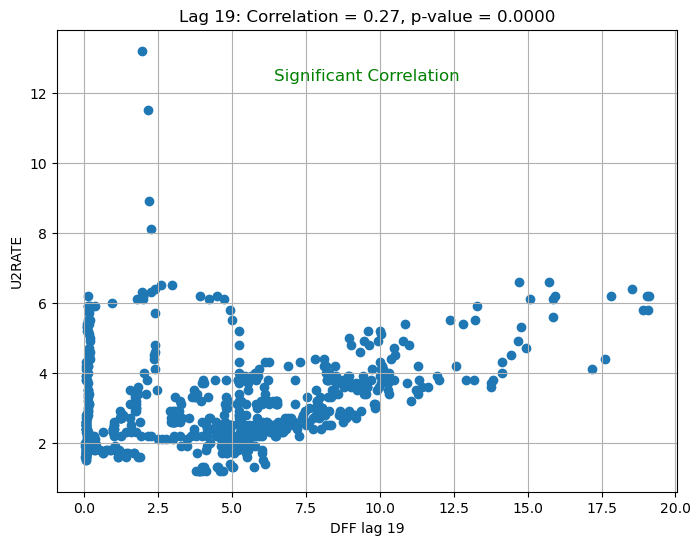

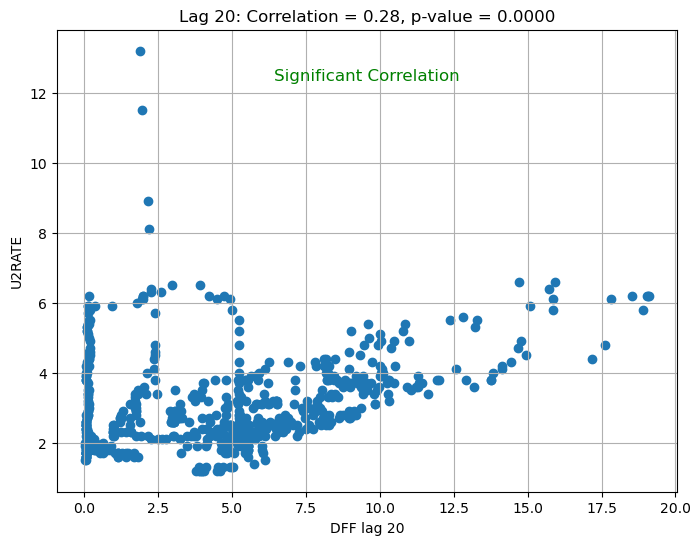

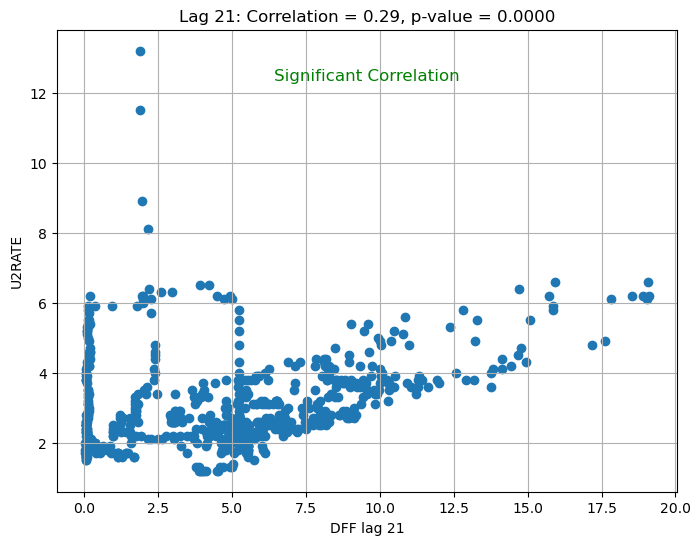

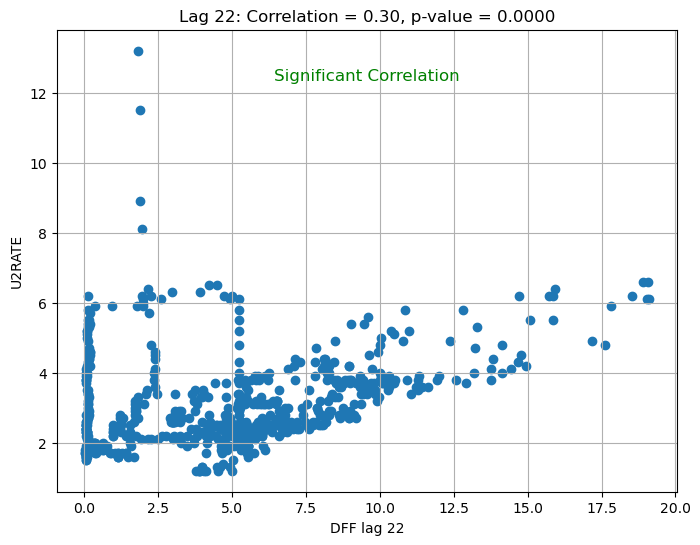

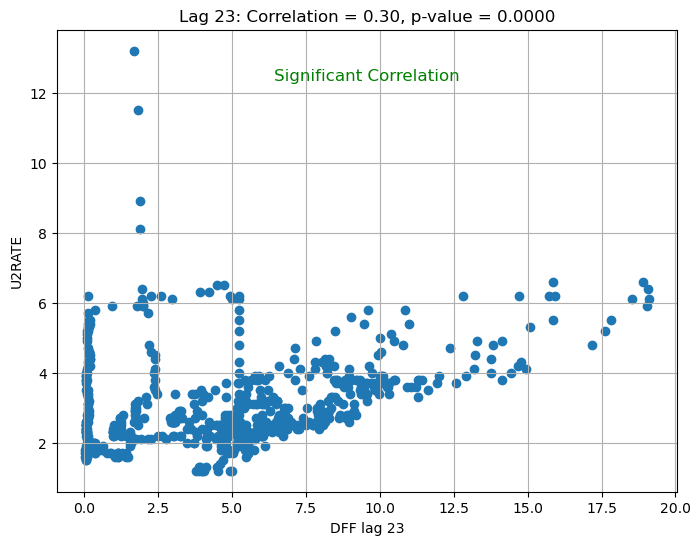

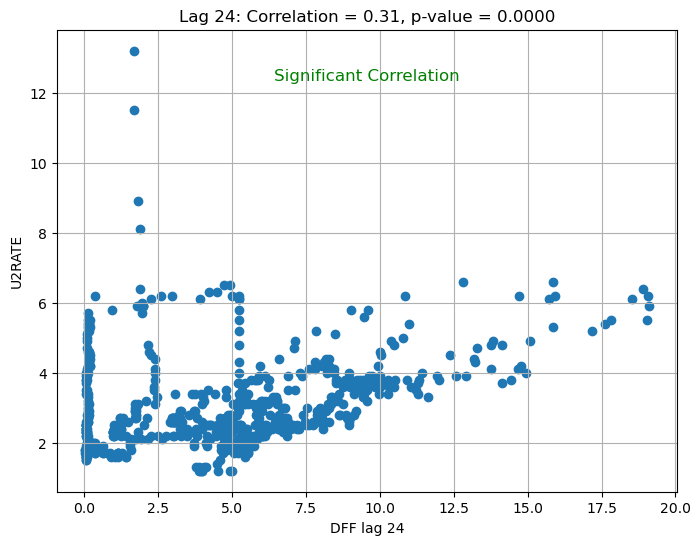

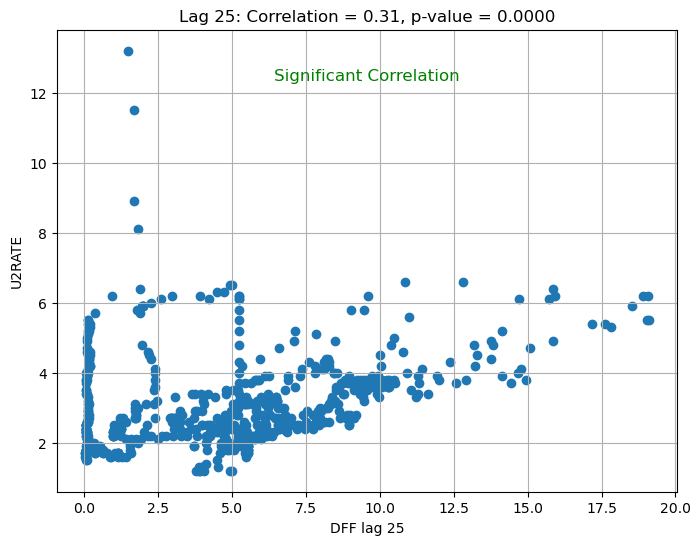

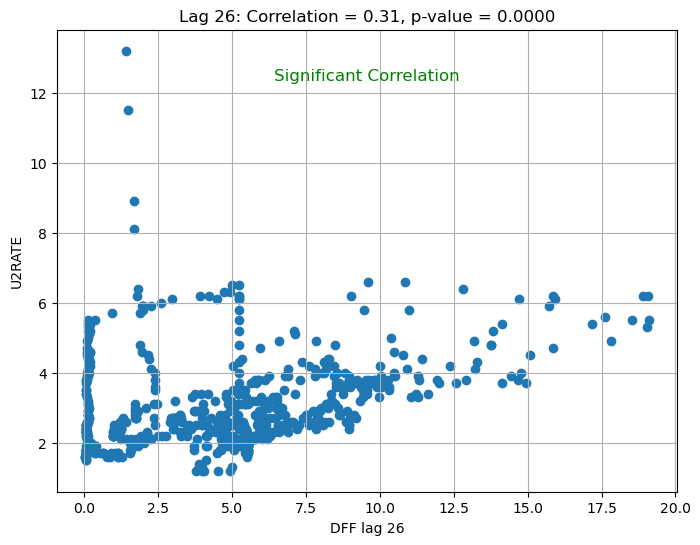

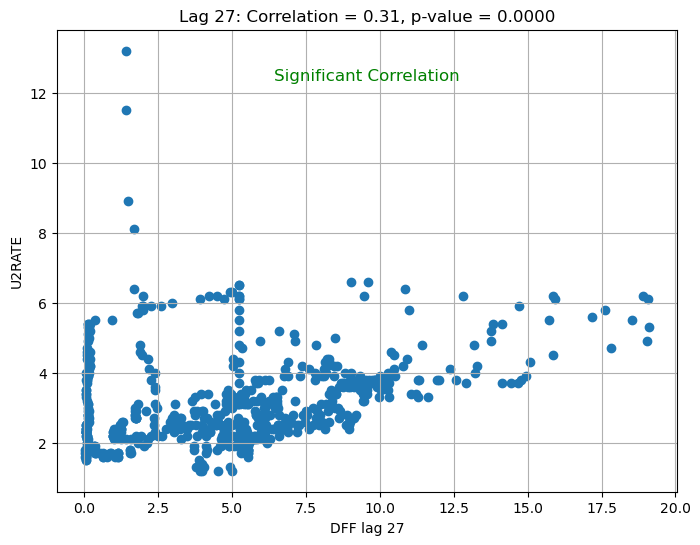

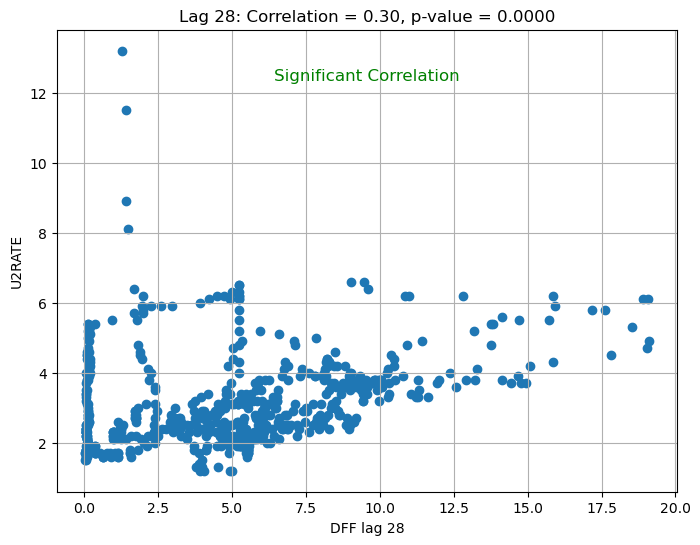

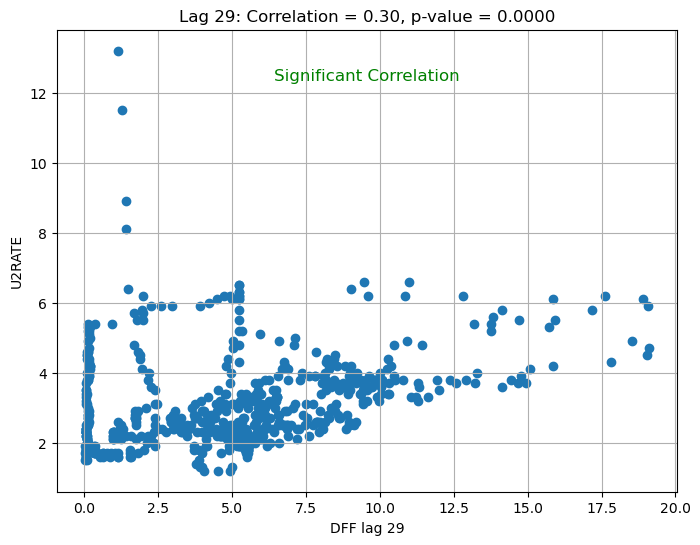

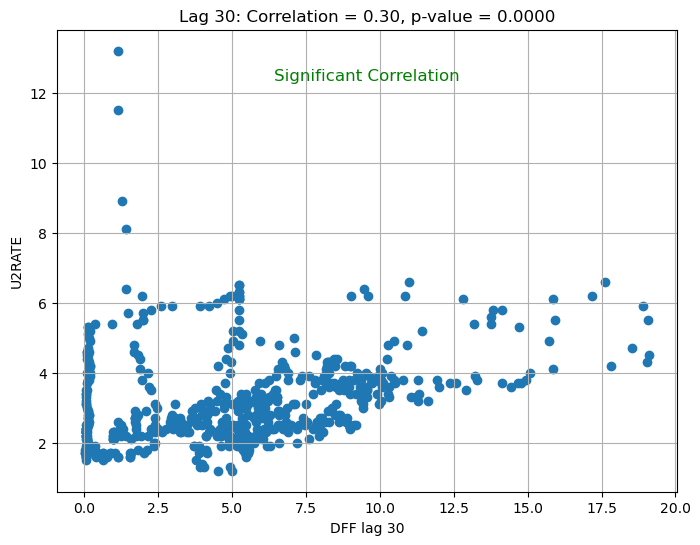

Lag 1: Correlation Coefficient = 0.22, p-value = 0.0000 (Significant)
Lag 2: Correlation Coefficient = 0.24, p-value = 0.0000 (Significant)
Lag 3: Correlation Coefficient = 0.25, p-value = 0.0000 (Significant)
Lag 4: Correlation Coefficient = 0.26, p-value = 0.0000 (Significant)
Lag 5: Correlation Coefficient = 0.27, p-value = 0.0000 (Significant)
Lag 6: Correlation Coefficient = 0.28, p-value = 0.0000 (Significant)
Lag 7: Correlation Coefficient = 0.29, p-value = 0.0000 (Significant)
Lag 8: Correlation Coefficient = 0.30, p-value = 0.0000 (Significant)
Lag 9: Correlation Coefficient = 0.30, p-value = 0.0000 (Significant)
Lag 10: Correlation Coefficient = 0.31, p-value = 0.0000 (Significant)
Lag 11: Correlation Coefficient = 0.31, p-value = 0.0000 (Significant)
Lag 12: Correlation Coefficient = 0.31, p-value = 0.0000 (Significant)
Lag 13: Correlation Coefficient = 0.31, p-value = 0.0000 (Significant)
Lag 14: Correlation Coefficient = 0.30, p-value = 0.0000 (Significant)
Lag 15: Correla

In [68]:
# Initialize lists to store correlation coefficients and p-values
correlation_coefficients = []
p_values = []

max_lag = 30

# Loop through each lag and calculate correlation coefficient and p-value
for lag in range(15, max_lag + 1):
    # Create lagged version of U2RATE series
    lagged_series = data['DFF'].shift(lag)
    
    # Trim DFF series to the same length as lagged U2RATE series
    min_length = min(len(data['U2RATE']), len(lagged_series))
    trimmed_U2RATE = data['U2RATE'].iloc[:min_length]
    
    # Trim lagged U2RATE series to the same length as DFF series
    trimmed_lagged_series = lagged_series.iloc[:min_length]
    
    # Remove NaNs from both trimmed series
    trimmed_U2RATE_cleaned = trimmed_U2RATE.dropna()
    trimmed_lagged_series_cleaned = trimmed_lagged_series.dropna()
    
    # Ensure both trimmed series have the same length
    common_index = trimmed_U2RATE_cleaned.index.intersection(trimmed_lagged_series_cleaned.index)
    trimmed_U2RATE_cleaned = trimmed_U2RATE_cleaned.loc[common_index]
    trimmed_lagged_series_cleaned = trimmed_lagged_series_cleaned.loc[common_index]
    
    # Calculate correlation coefficient and p-value
    correlation_coefficient, p_value = pearsonr(trimmed_U2RATE_cleaned, trimmed_lagged_series_cleaned)
    correlation_coefficients.append(correlation_coefficient)
    p_values.append(p_value)
    
    # Plot DFF against lagged U2RATE
    plt.figure(figsize=(8, 6))
    plt.scatter(trimmed_lagged_series_cleaned, trimmed_U2RATE_cleaned )
    plt.title(f'Lag {lag}: Correlation = {correlation_coefficient:.2f}, p-value = {p_value:.4f}')
    plt.xlabel(f'DFF lag {lag}')
    plt.ylabel('U2RATE')
    plt.grid(True)
    
    # Indicate significance of correlation
    if p_value < 0.05:
        plt.text(0.5, 0.9, 'Significant Correlation', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12, color='green')
    else:
        plt.text(0.5, 0.9, 'No Significant Correlation', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12, color='red')
    
    plt.show()

# Display correlation coefficients and p-values
for lag, (correlation_coefficient, p_value) in enumerate(zip(correlation_coefficients, p_values), start=1):
    significance = 'Significant' if p_value < 0.05 else 'Not Significant'
    print(f'Lag {lag}: Correlation Coefficient = {correlation_coefficient:.2f}, p-value = {p_value:.4f} ({significance})')


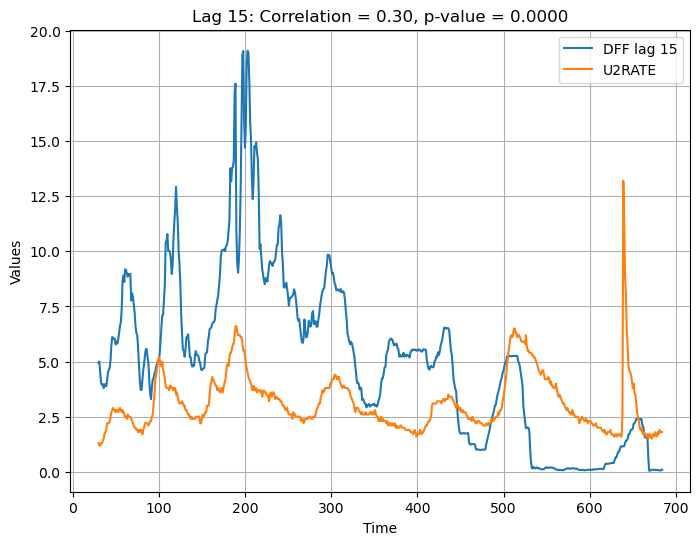

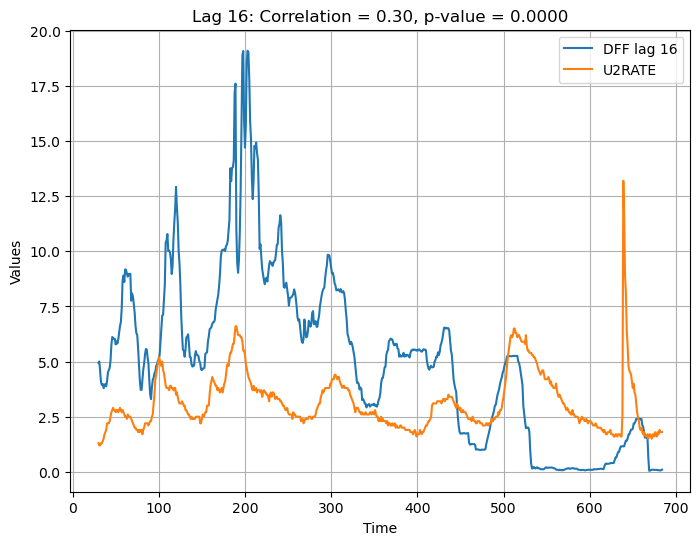

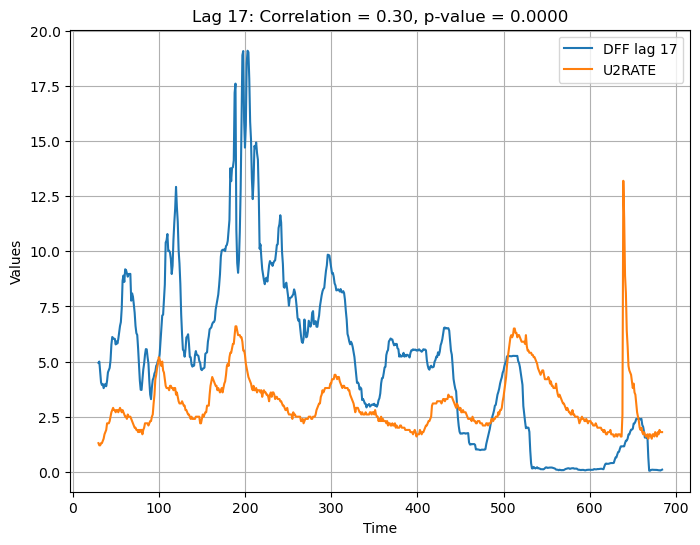

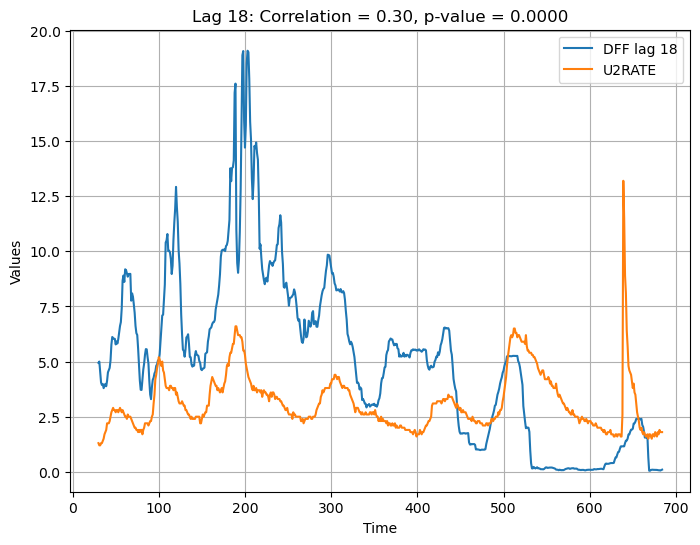

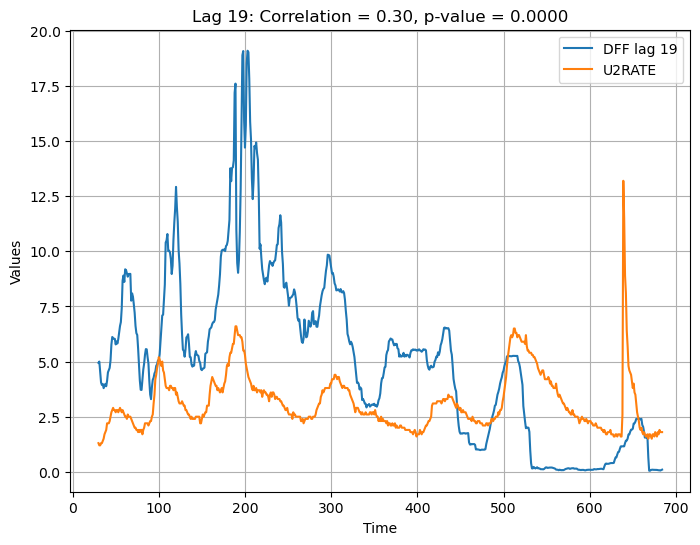

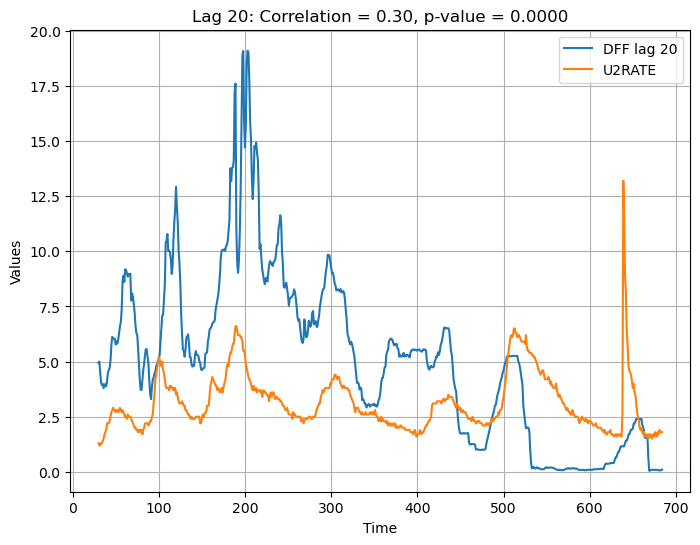

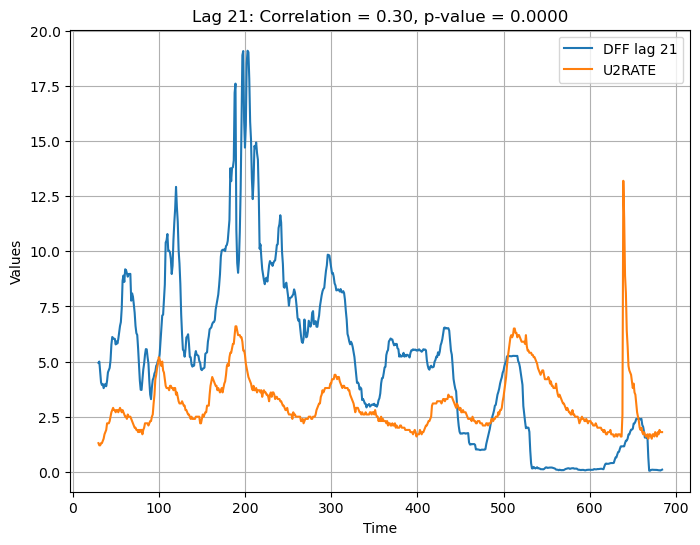

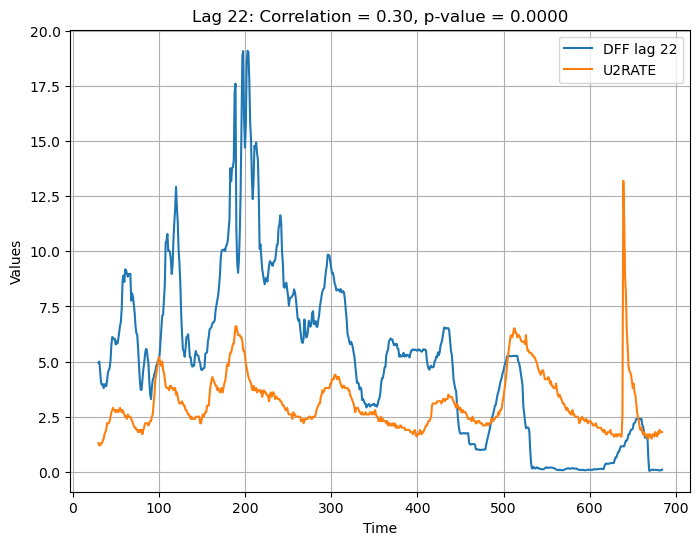

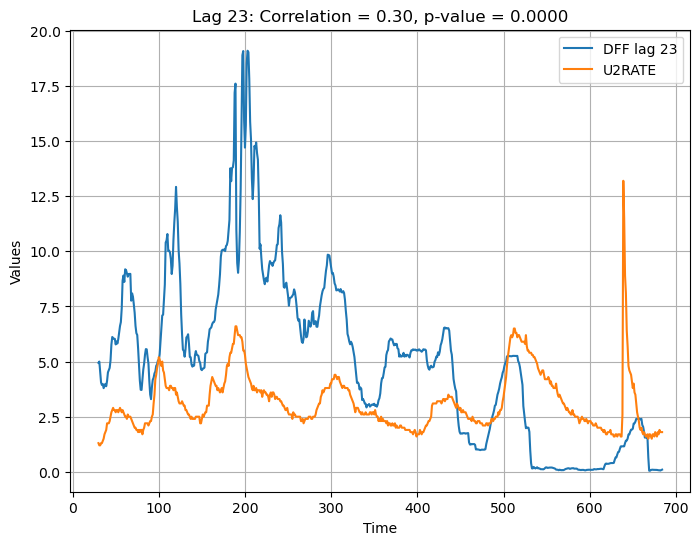

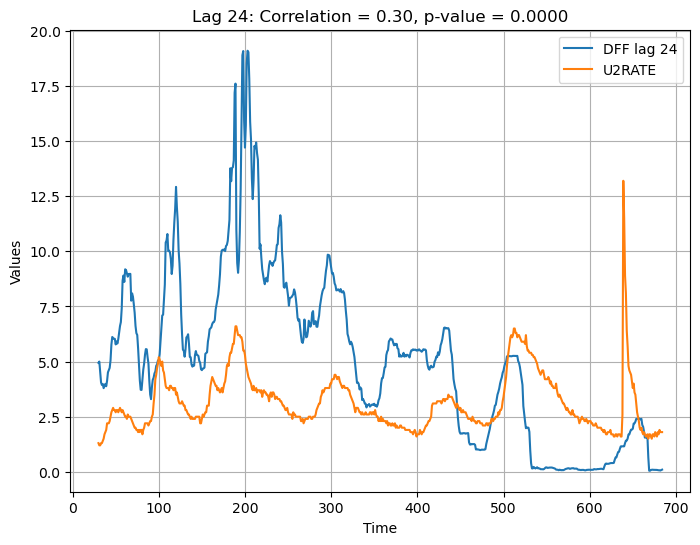

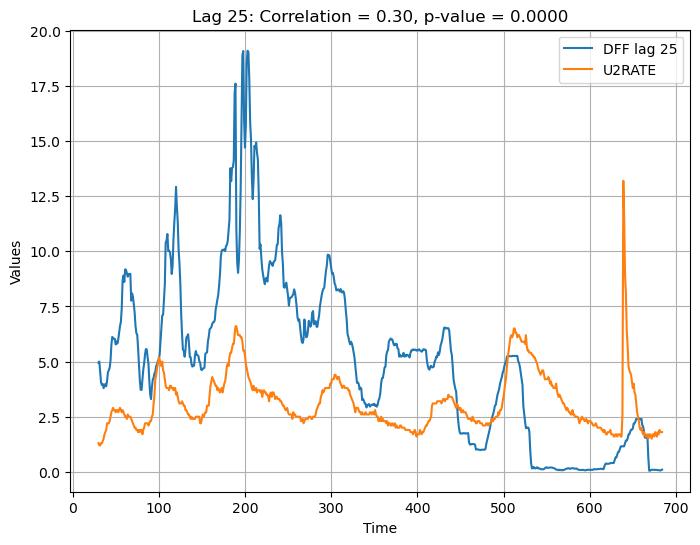

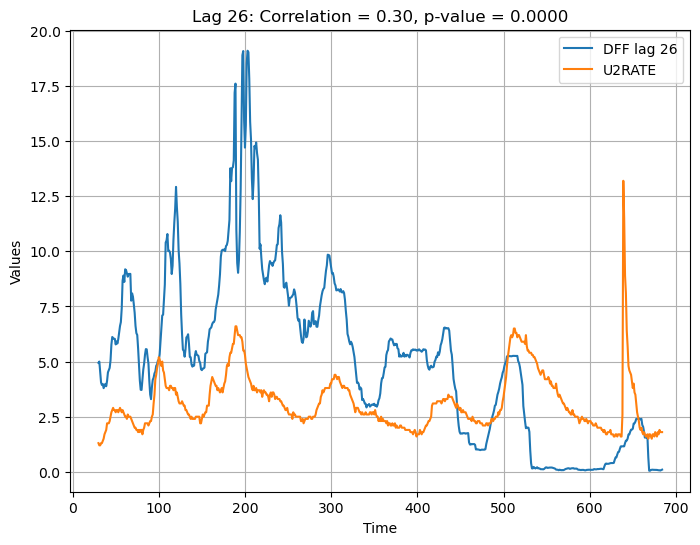

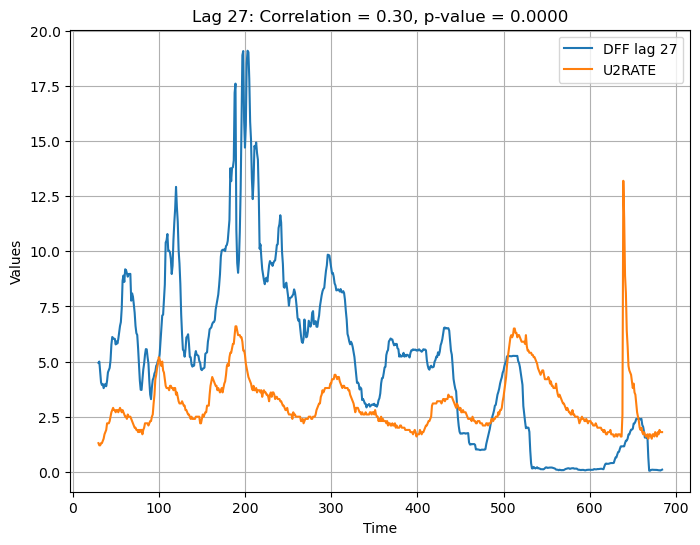

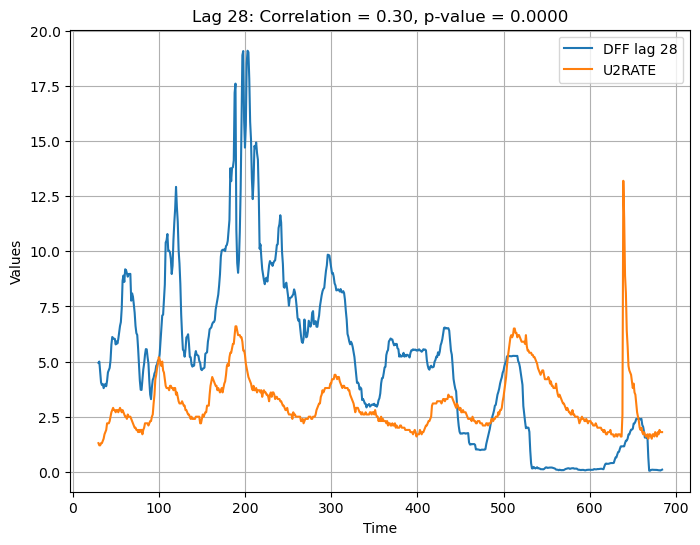

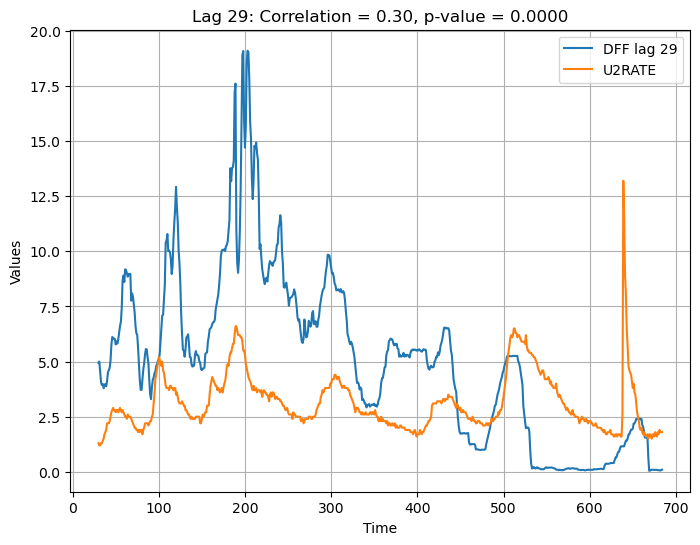

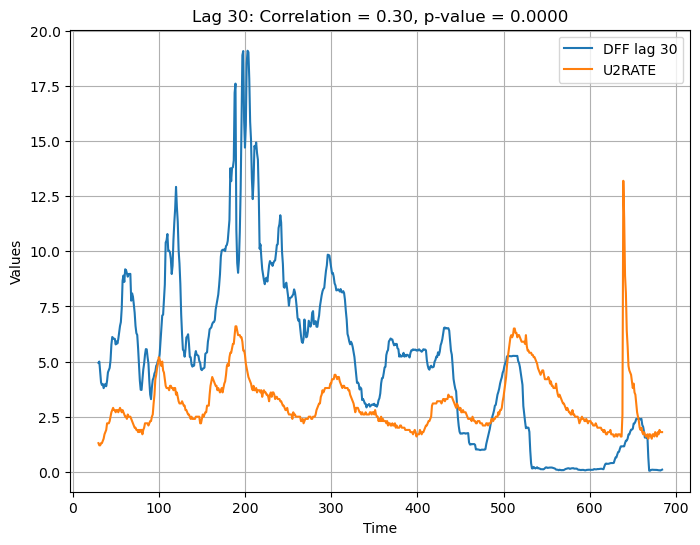

In [69]:
# Initialize lists to store correlation coefficients and p-values
correlation_coefficients = []
p_values = []

# Loop through each lag and calculate correlation coefficient and p-value
for lag in range(15, max_lag + 1):
    
    # Plot DFF and lagged U2RATE series
    plt.figure(figsize=(8, 6))
    plt.plot(trimmed_lagged_series_cleaned, label=f'DFF lag {lag}')
    plt.plot(trimmed_U2RATE_cleaned, label='U2RATE')
    plt.title(f'Lag {lag}: Correlation = {correlation_coefficient:.2f}, p-value = {p_value:.4f}')
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.legend()
    plt.grid(True)
    plt.show()

# Display correlation coefficients and p-values
for lag, (correlation_coefficient, p_value) in enumerate(zip(correlation_coefficients, p_values), start=1):
    significance = 'Significant' if p_value < 0.05 else 'Not Significant'
    print(f'Lag {lag}: Correlation Coefficient = {correlation_coefficient:.2f}, p-value = {p_value:.4f} ({significance})')
